## Tarea 2.8

Ejercicio 22, sección 1.2 del libro de Burden.

Queremos aproximar la función $e^{-5}$ y lo hacemos de dos maneras

* $\sum_{n=0}^9 \frac{1}{n!}(-5)^n$


* $\frac{1}{\sum_{n=0}^9 \frac{1}{n!} 5^n}$

Calcule los errores absolutos y relativos de cada aproximación. ¿Cuál es más precisa y por qué?

In [75]:
import math
s1 = 0; #acumulador
s2 = 0; #otro acumulador
real = math.exp(-5) #valor real
for n in range(0,10):
    s1 = s1 + ((-5)**n)/(math.factorial(n))
for n in range(0,10):
    s2 = s2+1/(math.factorial(n))*(5)**n
s2=1/s2
print(f'Valor real de e^{-5}={real}.\nEl resultado de la primera sumatoria es {s1}, mientras que el otro es {s2}\nEl error relativo es {abs(s1-real)/real} y {abs(s2-real)/real} respectivamente.')

Valor real de e^-5=0.006737946999085467.
El resultado de la primera sumatoria es 0.02445667144483013, mientras que el otro es 0.006959452863649537
El error relativo es 2.629691870261016 y 0.0328743851197011 respectivamente.


Es evidente que la segunda sumatoria es mucho mas exacta que la primera, esto se puede observar en los errores relativos. La Es evidente que la segunda sumatoria es mucho más exacta que la primera, esto se puede observar en los errores relativos. La razón es debido a que la distancia entre los valores de la primera sumatoria están más alejados que los de la segunda.

La serie de Taylor de $e^x$ es:


$$
e^{x} = \sum^{\infty}_{n=0} \frac{x^n}{n!} = 1 + x + \frac{x^2}{2!} + ...
$$
Si tomamos $x=-5$ y solo consideramos los primeros 9 términos de la sumatoria tenemos:

$$
e^{-5} = \sum^{9}_{n=0} \frac{-5^n}{n!}
$$
Bajo esta lógica la primera sumatoria debería ser la correcta, no obstante el número de términos no es suficiente para obtener un valor aproximado debido al signo negativo en el exponente, los primeros términos son "distantes" entre sí y el valor tenderá a un número negativo, a medida que consideramos más términos la sumatoria converge a valores positivos y por ende uno más cercano al esperado. Esto puede demostrarse considerando 20 interacciones en vez de 9.


In [132]:
s1=0; #Reiniciamos el contador
for n in range(0,21):
    s1 = s1 + ((-5)**n)/(math.factorial(n))
print(f'Con 20 interaciones se obtiene {s1}. Esto significa un error relativo de {abs(s1-real)/real}')

Con 20 interaciones se obtiene 0.006745540097711817. Esto significa un error relativo de 0.0011269157545140867


Como se puede ver el error es extremadamente pequeño en comparación con el error anterior, la pregunta es ¿Por qué la 2da sumatoria si da el valor buscado?.

Si observamos bien la 2da sumatoria es en realidad $\frac{1}{e^{5}}$ con $e^5$ expresado como suma de Taylor, como la sumatoria de Taylor de $e^{5}$ solo tiene valores positivos no nos encontramos con saltos entre positivos y negativos, por lo cual para iteraciones pequeñas obtenemos un valor siempre positivo.  

Estos "saltos" pueden verse graficando la función $f(a,x)=\frac{a^x}{x!}$ con $a=-5$ y $a=5$. 

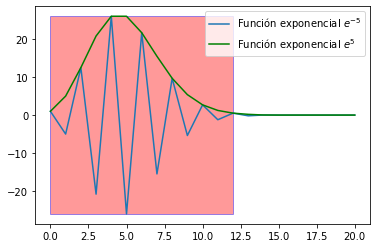

In [131]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import factorial
import matplotlib.patches as patches

def exp(a,x):
    return a**x / factorial(x)
fig,ax=plt.subplots(1)
ax.plot(np.arange(0,21,dtype=int),exp(-5,np.arange(0,21,dtype=int)),label="Función exponencial $e^{-5}$")
ax.plot(np.arange(0,21,dtype=int),exp(5,np.arange(0,21,dtype=int)),label="Función exponencial $e^{5}$",color="green")

ax.add_patch(
     patches.Rectangle(
        (0, 26),
        12,
        -52,
        edgecolor = 'blue',
        facecolor = 'red',
        alpha=0.4,
        fill=True
     ) )


ax.legend()


En la zona destacada con rojo podemos ver los "saltos" de la función exponencial de $e^{-5}$, después de esta la función convergen a 0.
